# Pregunta 1: Regresión lineal

In [189]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error

In [190]:
df = pd.read_csv("Base_de_Datos.csv")
df = df.fillna(0)

In [191]:
df.head()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
0,1983,Activision,1.94,2,1,0,0,0,0,0,0,0,0,0,0
1,1983,Nintendo,10.96,0,4,0,0,0,1,1,0,0,0,0,0
2,1984,Activision,0.27,0,0,0,0,0,0,0,1,0,0,0,0
3,1984,Nintendo,45.56,1,0,0,1,2,1,2,2,0,0,0,0
4,1985,Activision,0.48,0,0,0,1,0,0,0,0,1,0,0,0


In [192]:
df.tail()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
122,2015,Activision,35.63,17,3,0,0,9,5,4,0,0,0,0,1
123,2015,Electronic Arts,45.42,4,0,0,0,8,0,15,2,3,0,0,0
124,2015,Nintendo,27.08,7,4,0,4,1,6,1,0,1,0,7,1
125,2015,Sony Computer Entertainment,11.01,5,1,0,0,1,0,3,0,0,0,0,0
126,2015,Ubisoft,12.79,14,0,0,0,3,7,6,0,0,0,0,2


In [193]:
subdf = df[df['Publisher'].str.contains('Nintendo')]
subdf.head()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
1,1983,Nintendo,10.96,0,4,0,0,0,1,1,0,0,0,0,0
3,1984,Nintendo,45.56,1,0,0,1,2,1,2,2,0,0,0,0
5,1985,Nintendo,49.95,1,4,0,1,0,0,1,0,0,0,0,0
6,1986,Nintendo,16.18,3,2,0,0,0,0,0,1,0,0,0,0
8,1987,Nintendo,11.95,0,0,1,0,0,0,1,0,0,2,0,0


In [194]:
subdf.tail()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
104,2011,Nintendo,51.53,6,3,1,1,1,6,0,1,2,0,5,0
109,2012,Nintendo,56.47,7,2,1,1,0,6,2,0,2,1,9,0
114,2013,Nintendo,52.79,4,5,1,1,0,4,2,0,1,0,4,1
119,2014,Nintendo,48.65,4,3,0,1,0,2,2,1,1,2,4,0
124,2015,Nintendo,27.08,7,4,0,4,1,6,1,0,1,0,7,1


In [195]:
def test_train_split_plot(x_train, y_train, x_test, y_test):
    plt.scatter(x_train, y_train, label='Training Data', color='r', alpha=.7)
    plt.scatter(x_test, y_test, label='Testing Data', color='g', alpha=.7)
    plt.legend()
    plt.title("Test Train Split")
    plt.show()
    
def prediction(LR, x_test, y_test):
    prediction = LR.predict(x_test.values.reshape(-1, 1))
    plt.plot(x_test, prediction, label='Linear Regresion', color='b')
    plt.scatter(x_test, y_test, label='Actual Test Data', color='g', alpha=.7)
    plt.legend()
    plt.show()

def linear_regression(df, x, y):
    x_train, x_test, y_train, y_test = train_test_split(df[x], df[y])
    test_train_split_plot(x_train, y_train, x_test, y_test)
    LR = LinearRegression()
    LR.fit(x_train.values.reshape(-1, 1), y_train.values)
    prediction(LR, x_test, y_test)
    y_pred = LR.predict(x_test.values.reshape(-1, 1))
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    return mae
    
def linear_regression_dataset(df, target_variable,columns_names):
    mae = {}
    for name in columns_names:
        print(name)
        df.plot.scatter(x = str(name), y = target_variable)
        mae_item = linear_regression(df, str(name), target_variable)
        print("Mean absolute error of " + name + ": " + str(mae_item))
        mae[str(name)] = mae_item
    return mae
        

In [196]:
columns_names = ['Action', 'Platform', 'Adventure', 'Puzzle', 'Shooter', 'Misc', 'Sports', 'Racing', 'Simulation', 'Fighting', 'Role-Playing', 'Strategy']

In [197]:
all_mae = {}

Action


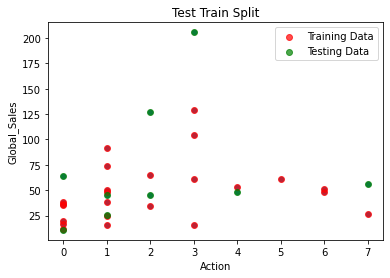

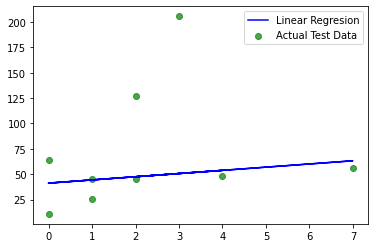

Mean absolute error of Action: 35.74
Platform


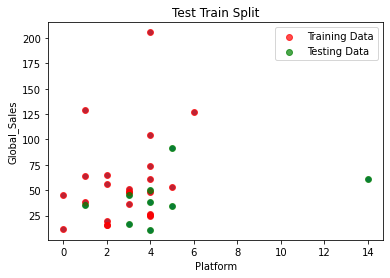

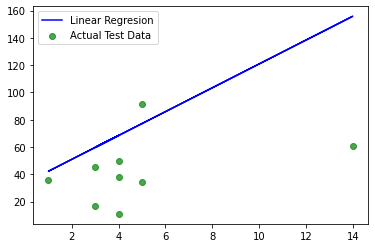

Mean absolute error of Platform: 35.87
Adventure


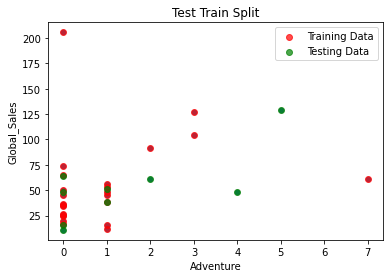

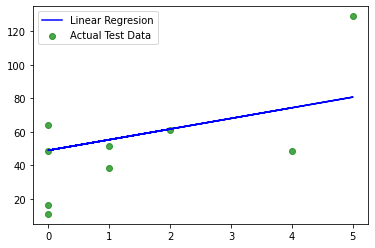

Mean absolute error of Adventure: 20.17
Puzzle


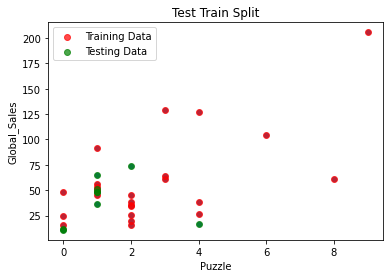

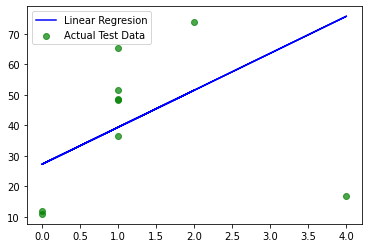

Mean absolute error of Puzzle: 19.13
Shooter


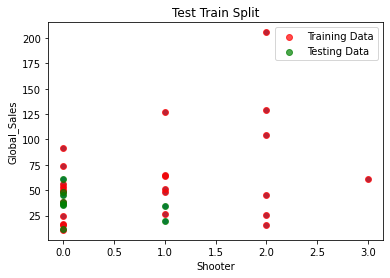

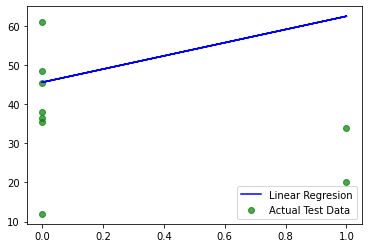

Mean absolute error of Shooter: 16.66
Misc


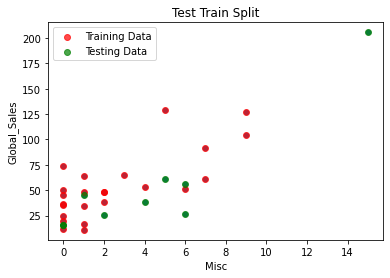

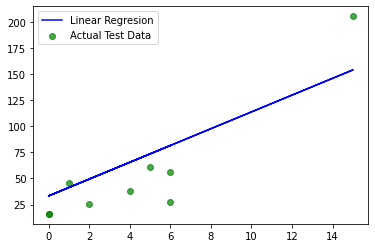

Mean absolute error of Misc: 25.89
Sports


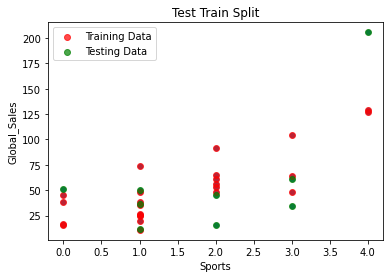

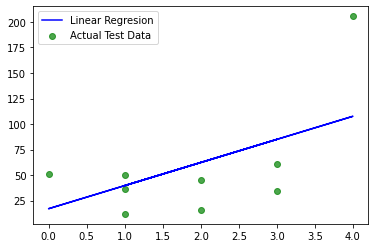

Mean absolute error of Sports: 34.67
Racing


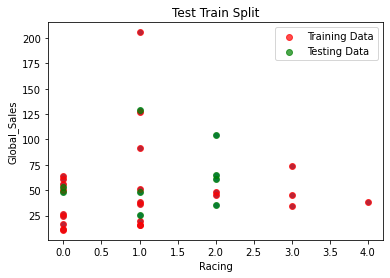

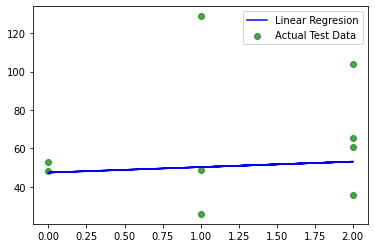

Mean absolute error of Racing: 22.17
Simulation


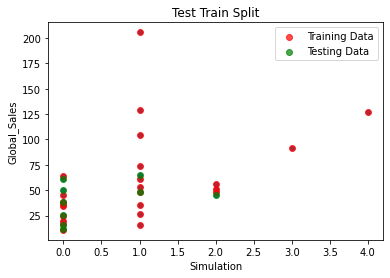

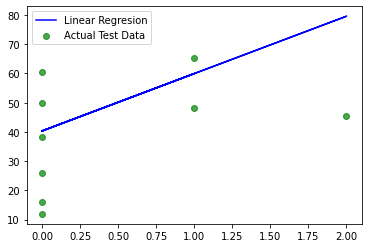

Mean absolute error of Simulation: 16.71
Fighting


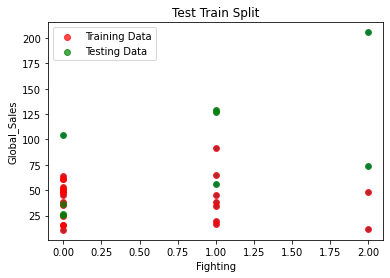

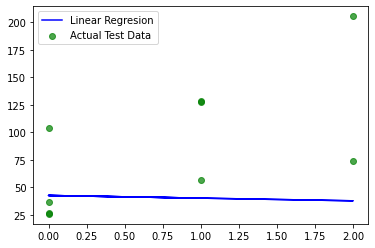

Mean absolute error of Fighting: 55.13
Role-Playing


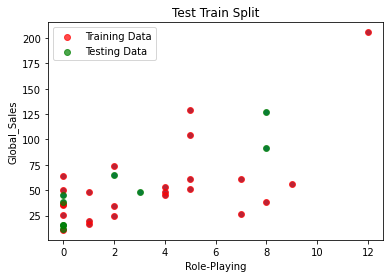

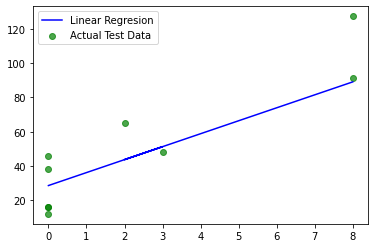

Mean absolute error of Role-Playing: 14.79
Strategy


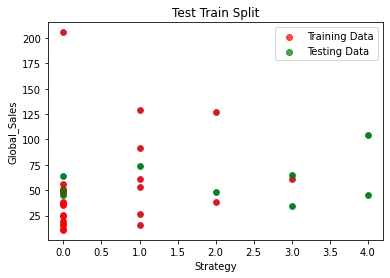

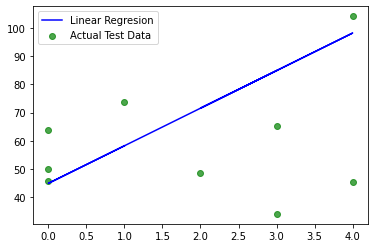

Mean absolute error of Strategy: 21.4


In [198]:
all_mae['Nintendo'] = linear_regression_dataset(df = subdf, target_variable = 'Global_Sales',columns_names = columns_names)

In [199]:
publisher_names = df['Publisher'].unique()
df['Publisher'].unique()

array(['Activision', 'Nintendo', 'Electronic Arts',
       'Sony Computer Entertainment', 'Ubisoft'], dtype=object)

In [200]:
subdf2 = df[df['Publisher'].str.contains('Activision')]
subdf2.head()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
0,1983,Activision,1.94,2,1,0,0,0,0,0,0,0,0,0,0
2,1984,Activision,0.27,0,0,0,0,0,0,0,1,0,0,0,0
4,1985,Activision,0.48,0,0,0,1,0,0,0,0,1,0,0,0
7,1987,Activision,1.12,2,0,0,0,0,0,0,0,0,0,0,0
9,1988,Activision,0.75,1,0,0,0,1,0,0,0,0,0,0,0


In [201]:
subdf2.tail()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
102,2011,Activision,51.74,24,1,2,0,8,13,9,12,5,0,0,1
107,2012,Activision,53.25,29,0,0,0,7,2,0,2,0,0,2,0
112,2013,Activision,43.49,8,7,0,0,12,0,0,0,0,0,2,9
117,2014,Activision,44.48,22,0,3,1,12,0,0,0,0,0,3,1
122,2015,Activision,35.63,17,3,0,0,9,5,4,0,0,0,0,1


Action


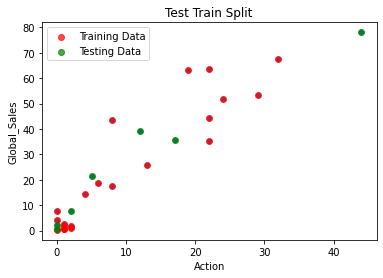

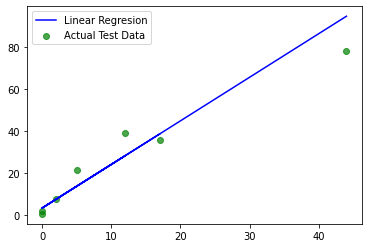

Mean absolute error of Action: 6.08
Platform


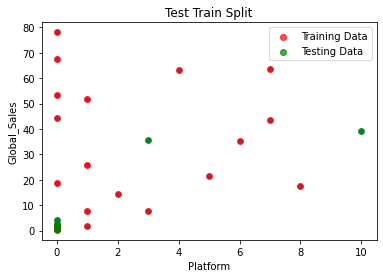

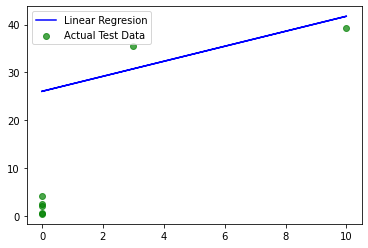

Mean absolute error of Platform: 18.23
Adventure


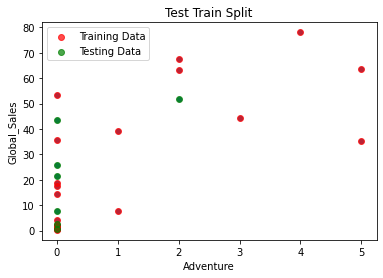

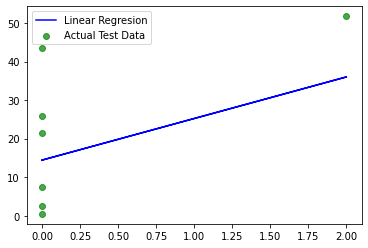

Mean absolute error of Adventure: 13.71
Puzzle


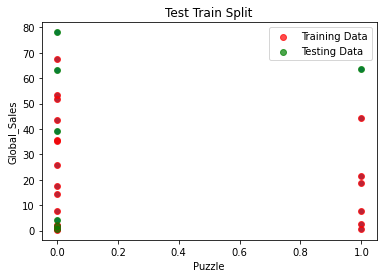

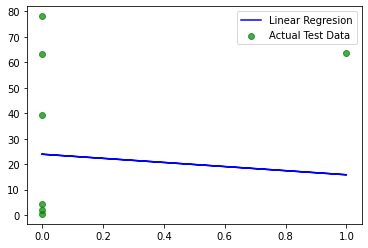

Mean absolute error of Puzzle: 31.68
Shooter


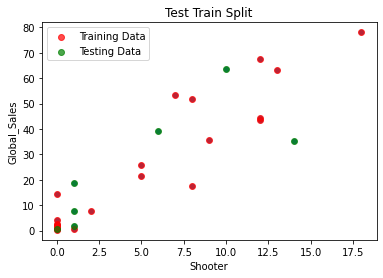

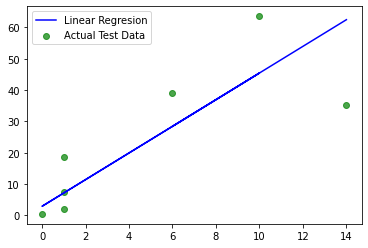

Mean absolute error of Shooter: 10.78
Misc


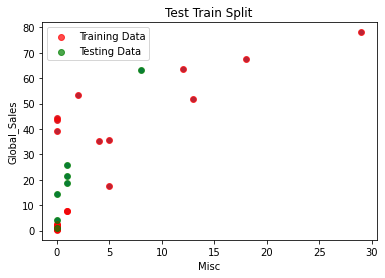

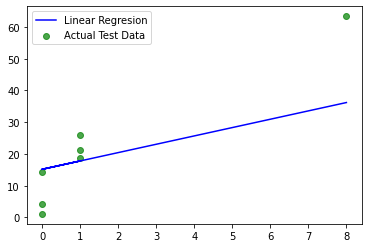

Mean absolute error of Misc: 9.34
Sports


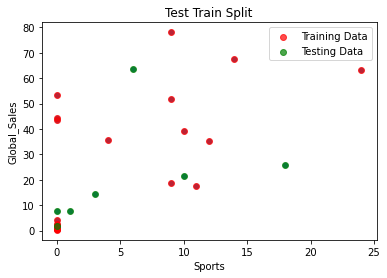

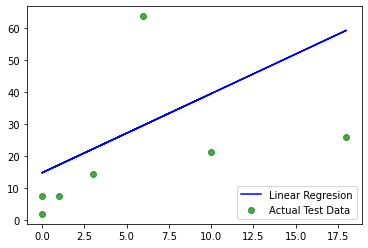

Mean absolute error of Sports: 17.54
Racing


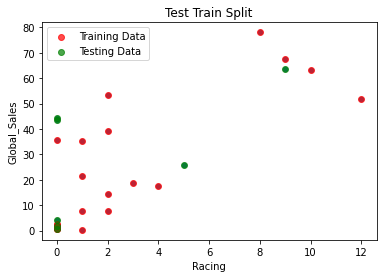

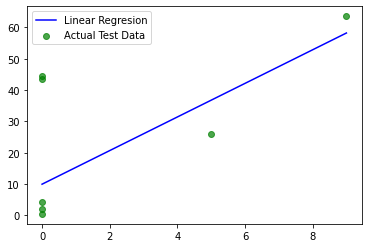

Mean absolute error of Racing: 15.35
Simulation


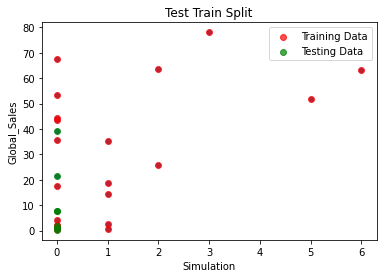

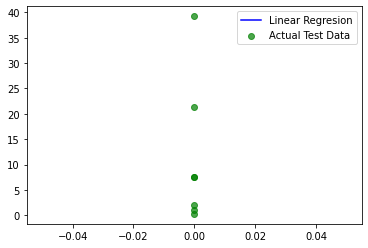

Mean absolute error of Simulation: 15.25
Fighting


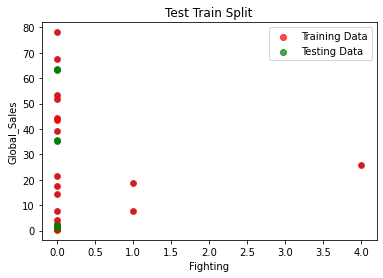

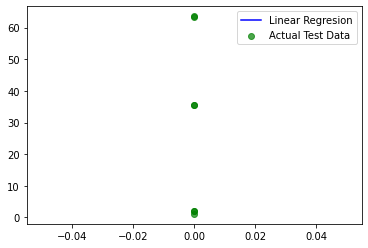

Mean absolute error of Fighting: 24.11
Role-Playing


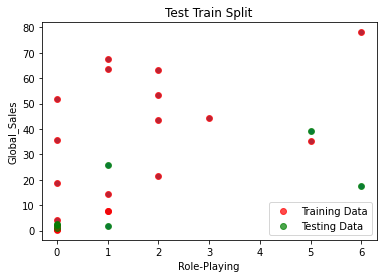

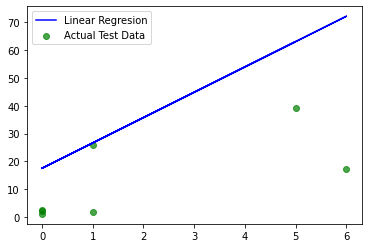

Mean absolute error of Role-Playing: 21.55
Strategy


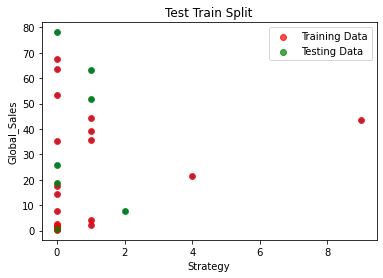

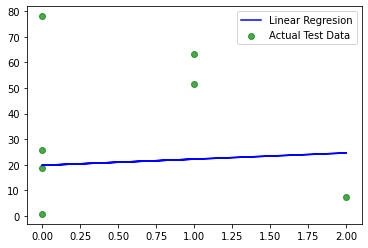

Mean absolute error of Strategy: 24.64


In [202]:

all_mae['Activision'] = linear_regression_dataset(df = subdf2, target_variable = 'Global_Sales',columns_names = columns_names)

In [203]:
subdf3 = df[df['Publisher'].str.contains('Electronic Arts')]
subdf3.head()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
15,1992,Electronic Arts,0.06,0,0,0,0,0,0,0,0,0,0,0,1
19,1994,Electronic Arts,0.65,0,0,0,0,0,0,0,0,2,0,0,0
23,1995,Electronic Arts,3.33,0,0,1,0,3,1,2,3,1,0,0,0
28,1996,Electronic Arts,7.90,3,0,1,0,0,0,6,2,1,0,0,0
33,1997,Electronic Arts,22.94,1,0,0,0,0,0,12,3,3,1,1,4


In [204]:
subdf3.tail()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
103,2011,Electronic Arts,72.25,22,0,3,0,9,7,20,3,7,2,3,0
108,2012,Electronic Arts,49.90,16,0,0,0,1,0,17,4,1,0,7,0
113,2013,Electronic Arts,52.92,2,0,0,0,12,0,21,6,1,0,0,0
118,2014,Electronic Arts,46.80,0,0,0,0,8,0,22,0,1,0,5,0
123,2015,Electronic Arts,45.42,4,0,0,0,8,0,15,2,3,0,0,0


Action


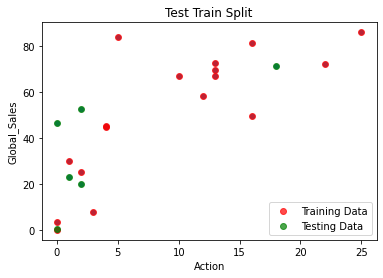

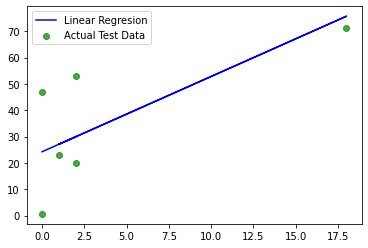

Mean absolute error of Action: 14.57
Platform


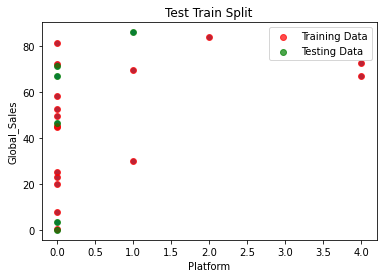

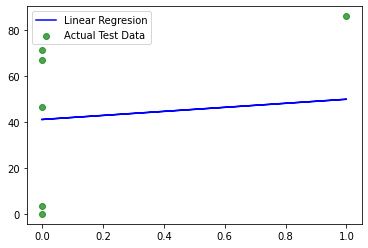

Mean absolute error of Platform: 29.45
Adventure


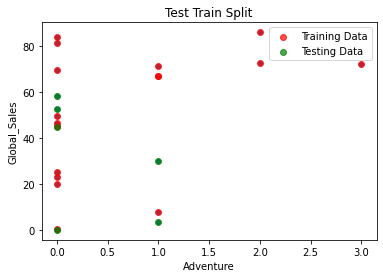

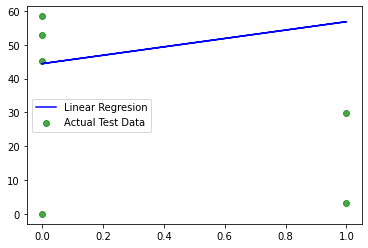

Mean absolute error of Adventure: 24.65
Puzzle


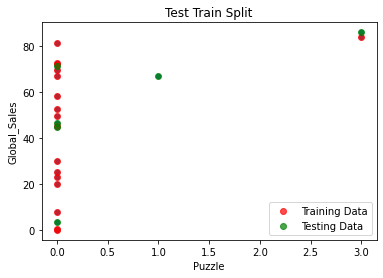

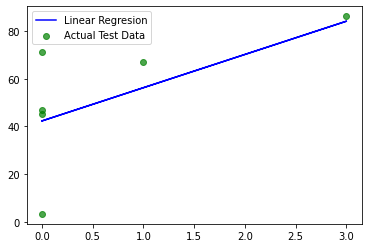

Mean absolute error of Puzzle: 14.68
Shooter


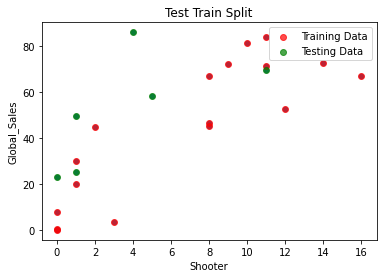

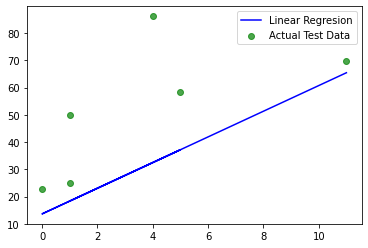

Mean absolute error of Shooter: 21.17
Misc


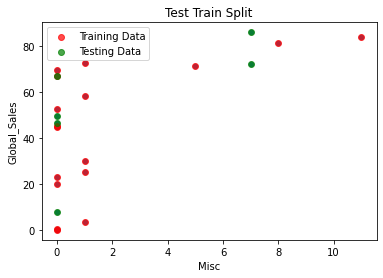

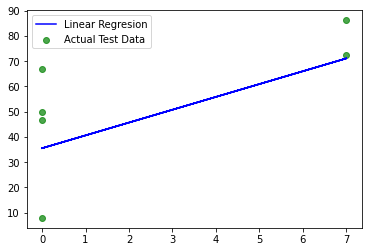

Mean absolute error of Misc: 16.84
Sports


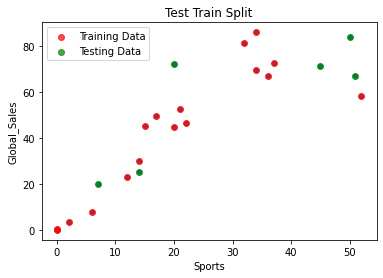

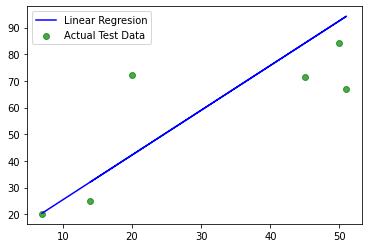

Mean absolute error of Sports: 14.3
Racing


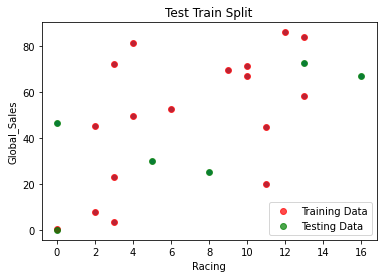

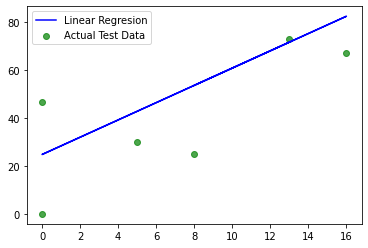

Mean absolute error of Racing: 17.48
Simulation


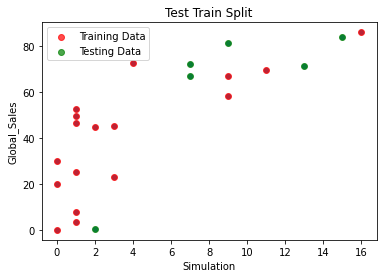

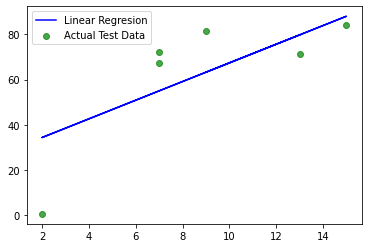

Mean absolute error of Simulation: 15.62
Fighting


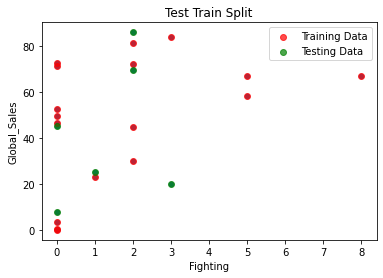

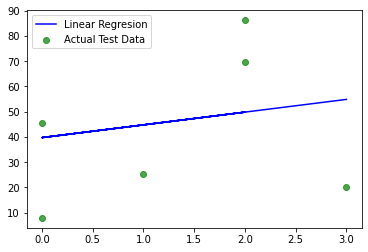

Mean absolute error of Fighting: 24.71
Role-Playing


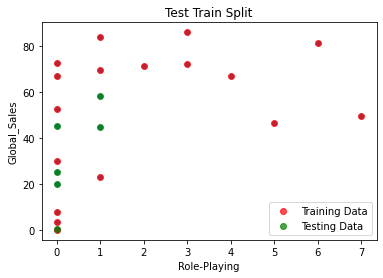

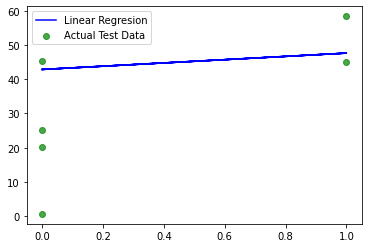

Mean absolute error of Role-Playing: 16.42
Strategy


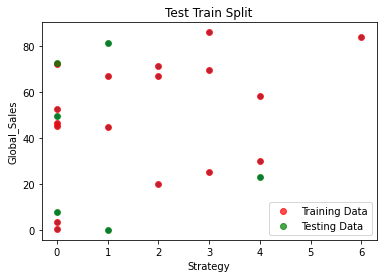

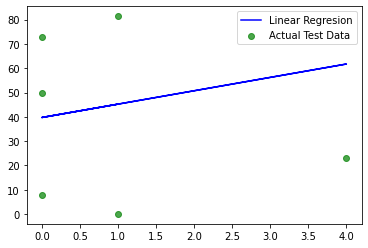

Mean absolute error of Strategy: 32.56


In [205]:
all_mae['Electronic Arts'] = linear_regression_dataset(df = subdf3, target_variable = 'Global_Sales',columns_names = columns_names)

In [206]:
subdf4 = df[df['Publisher'].str.contains('Sony Computer Entertainment')]
subdf4.head()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
21,1994,Sony Computer Entertainment,3.43,0,0,0,0,1,0,2,2,0,1,1,0
25,1995,Sony Computer Entertainment,18.45,2,2,1,0,5,2,4,1,3,4,4,3
30,1996,Sony Computer Entertainment,35.07,0,2,0,0,0,7,6,4,1,5,3,0
35,1997,Sony Computer Entertainment,43.90,3,3,2,1,4,1,5,7,3,1,2,2
40,1998,Sony Computer Entertainment,34.64,4,4,3,3,0,4,4,1,1,4,2,0


In [207]:
subdf4.tail()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
105,2011,Sony Computer Entertainment,27.40,8,4,1,0,5,9,5,1,1,0,2,0
110,2012,Sony Computer Entertainment,12.85,11,2,2,0,2,0,3,3,0,1,0,0
115,2013,Sony Computer Entertainment,12.61,3,0,3,0,2,0,2,1,0,0,1,0
120,2014,Sony Computer Entertainment,19.02,6,2,0,0,0,1,0,1,0,0,3,0
125,2015,Sony Computer Entertainment,11.01,5,1,0,0,1,0,3,0,0,0,0,0


Action


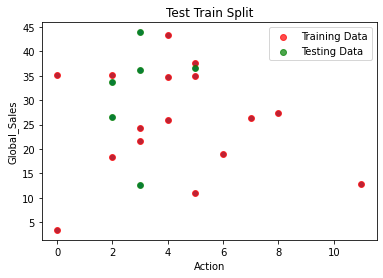

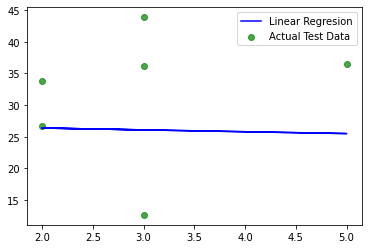

Mean absolute error of Action: 10.04
Platform


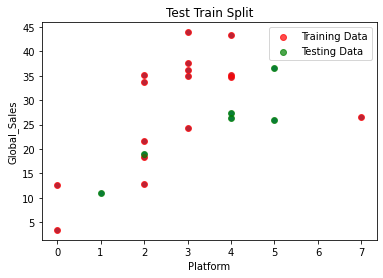

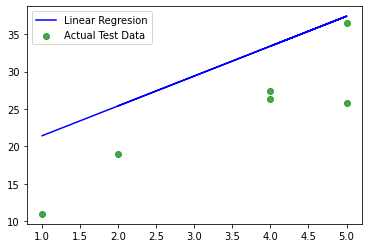

Mean absolute error of Platform: 7.03
Adventure


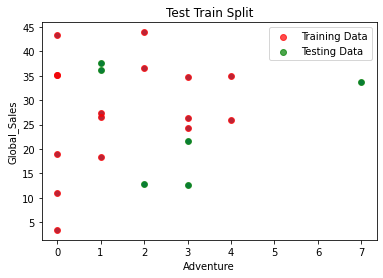

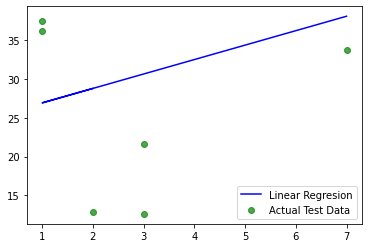

Mean absolute error of Adventure: 11.2
Puzzle


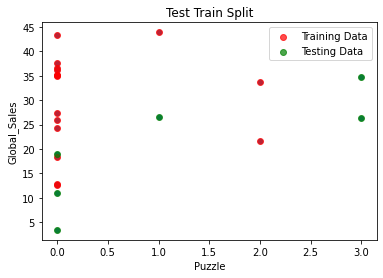

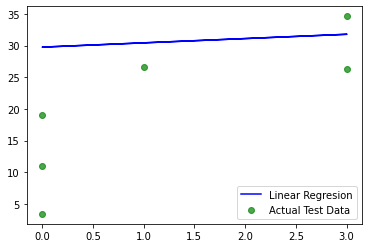

Mean absolute error of Puzzle: 11.32
Shooter


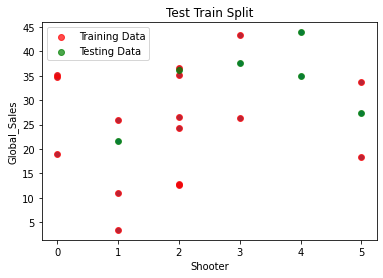

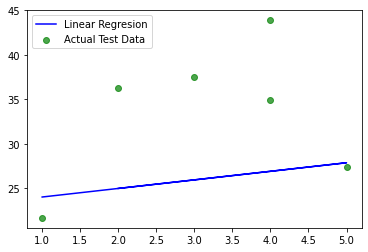

Mean absolute error of Shooter: 8.43
Misc


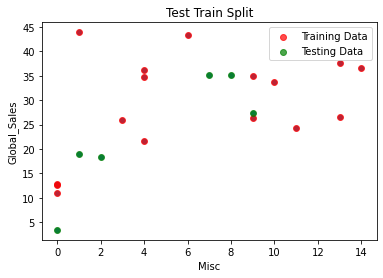

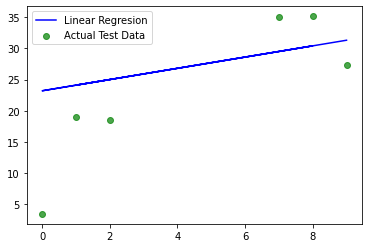

Mean absolute error of Misc: 7.6
Sports


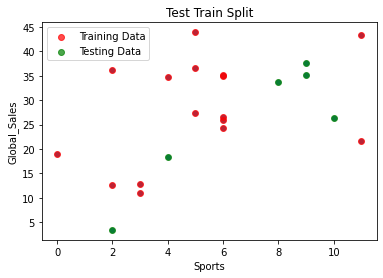

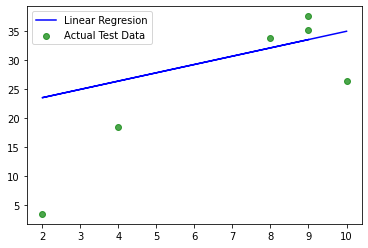

Mean absolute error of Sports: 7.32
Racing


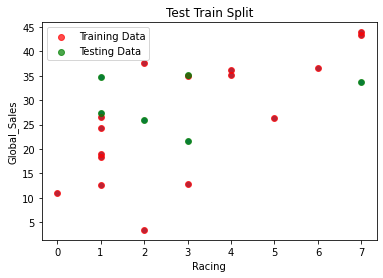

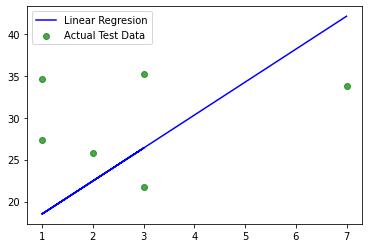

Mean absolute error of Racing: 8.35
Simulation


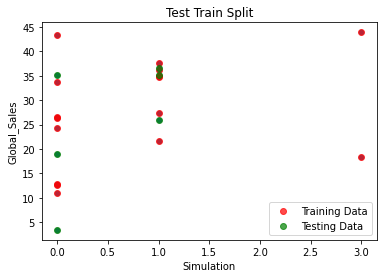

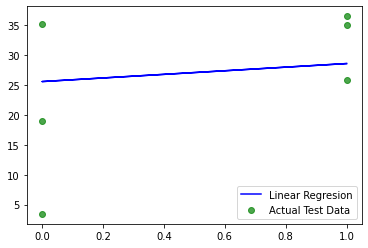

Mean absolute error of Simulation: 9.24
Fighting


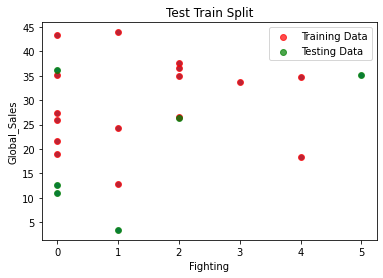

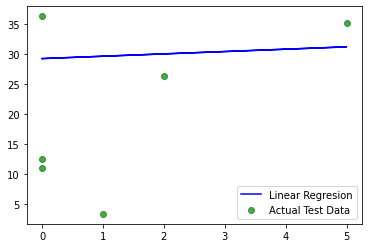

Mean absolute error of Fighting: 12.59
Role-Playing


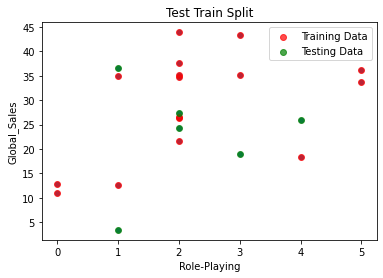

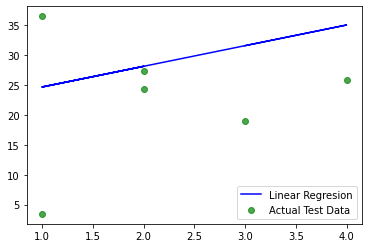

Mean absolute error of Role-Playing: 9.91
Strategy


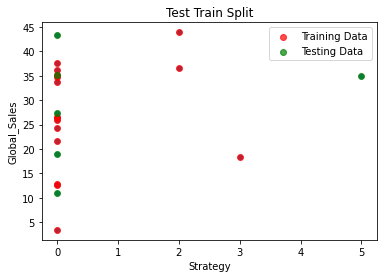

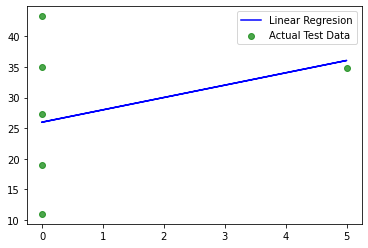

Mean absolute error of Strategy: 8.48


In [208]:
all_mae['Sony Computer Entertainment'] = linear_regression_dataset(df = subdf4, target_variable = 'Global_Sales',columns_names = columns_names)

In [209]:
subdf5 = df[df['Publisher'].str.contains('Ubisoft')]
subdf5.head()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
26,1995,Ubisoft,3.03,0,1,0,0,0,0,0,0,0,0,0,0
31,1996,Ubisoft,0.16,0,0,0,0,0,0,0,1,0,0,0,0
36,1997,Ubisoft,0.25,0,0,0,0,0,0,0,1,0,0,0,0
41,1998,Ubisoft,0.30,1,0,0,0,0,0,0,2,0,0,0,0
46,1999,Ubisoft,4.61,0,3,0,0,0,1,3,3,2,0,1,0


In [210]:
subdf5.tail()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
106,2011,Ubisoft,48.03,13,6,6,1,5,29,8,9,5,1,1,3
111,2012,Ubisoft,37.31,10,3,0,0,7,10,1,0,1,0,0,0
116,2013,Ubisoft,27.39,10,8,0,0,0,10,0,0,0,1,0,0
121,2014,Ubisoft,41.95,11,3,0,1,5,11,0,7,0,0,6,0
126,2015,Ubisoft,12.79,14,0,0,0,3,7,6,0,0,0,0,2


Action


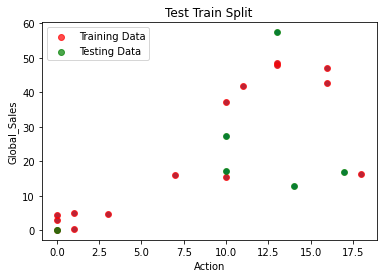

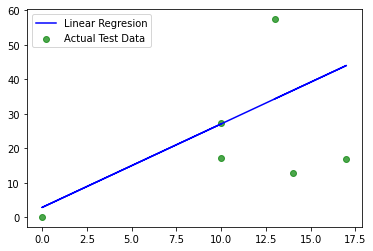

Mean absolute error of Action: 14.51
Platform


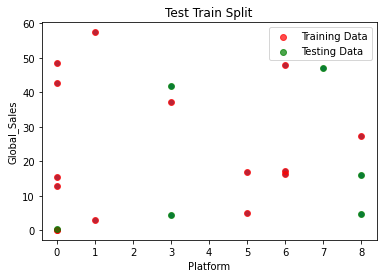

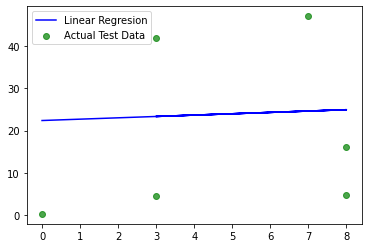

Mean absolute error of Platform: 18.45
Adventure


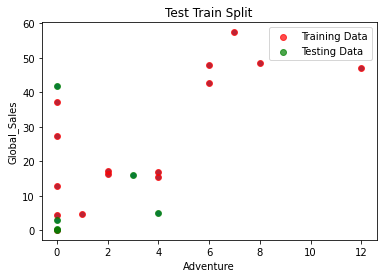

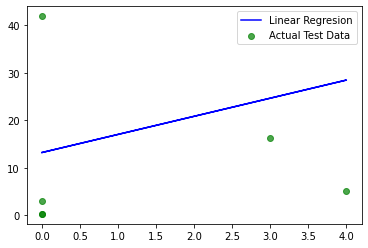

Mean absolute error of Adventure: 16.12
Puzzle


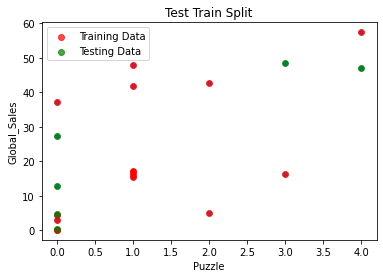

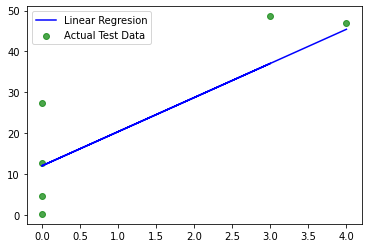

Mean absolute error of Puzzle: 8.04
Shooter


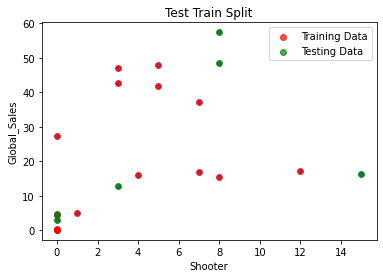

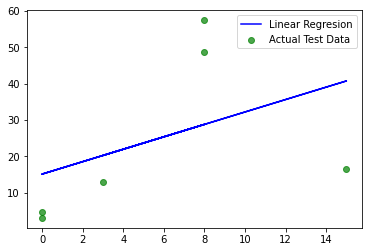

Mean absolute error of Shooter: 17.1
Misc


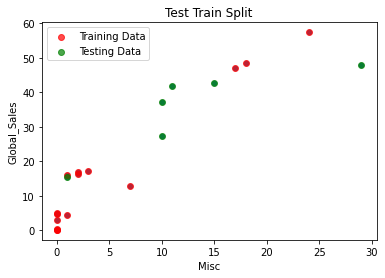

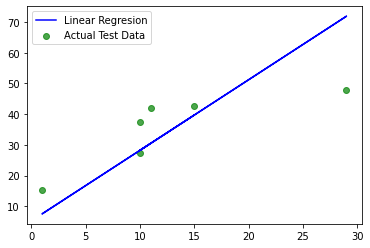

Mean absolute error of Misc: 9.33
Sports


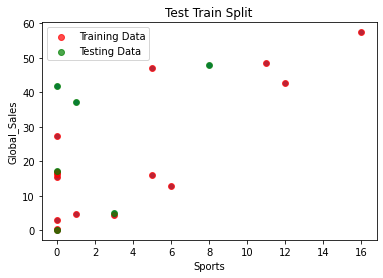

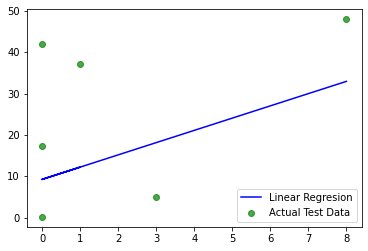

Mean absolute error of Sports: 17.19
Racing


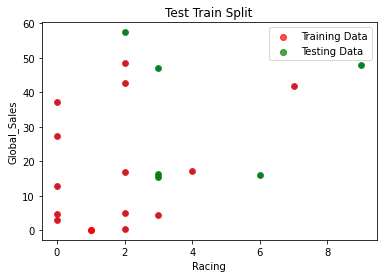

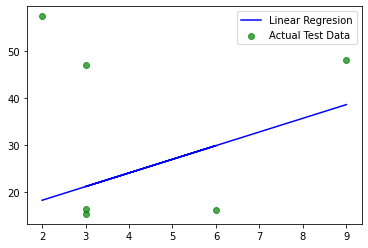

Mean absolute error of Racing: 16.43
Simulation


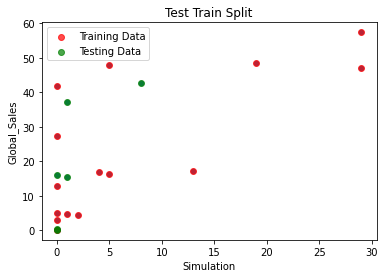

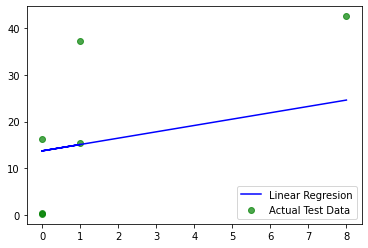

Mean absolute error of Simulation: 11.67
Fighting


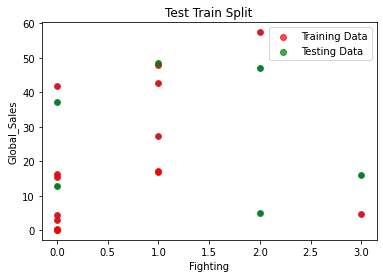

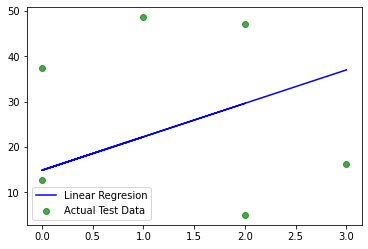

Mean absolute error of Fighting: 18.95
Role-Playing


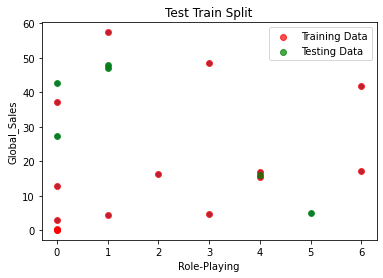

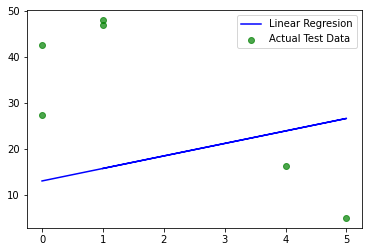

Mean absolute error of Role-Playing: 22.8
Strategy


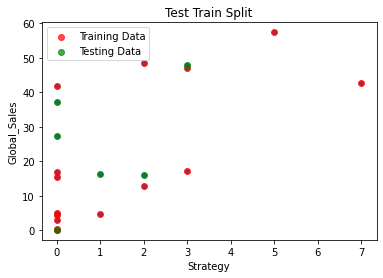

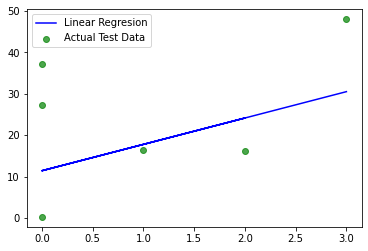

Mean absolute error of Strategy: 13.3


In [211]:
all_mae['Ubisoft'] = linear_regression_dataset(df = subdf5, target_variable = 'Global_Sales',columns_names = columns_names)

In [212]:
print(all_mae)

{'Nintendo': {'Action': 35.74, 'Platform': 35.87, 'Adventure': 20.17, 'Puzzle': 19.13, 'Shooter': 16.66, 'Misc': 25.89, 'Sports': 34.67, 'Racing': 22.17, 'Simulation': 16.71, 'Fighting': 55.13, 'Role-Playing': 14.79, 'Strategy': 21.4}, 'Activision': {'Action': 6.08, 'Platform': 18.23, 'Adventure': 13.71, 'Puzzle': 31.68, 'Shooter': 10.78, 'Misc': 9.34, 'Sports': 17.54, 'Racing': 15.35, 'Simulation': 15.25, 'Fighting': 24.11, 'Role-Playing': 21.55, 'Strategy': 24.64}, 'Electronic Arts': {'Action': 14.57, 'Platform': 29.45, 'Adventure': 24.65, 'Puzzle': 14.68, 'Shooter': 21.17, 'Misc': 16.84, 'Sports': 14.3, 'Racing': 17.48, 'Simulation': 15.62, 'Fighting': 24.71, 'Role-Playing': 16.42, 'Strategy': 32.56}, 'Sony Computer Entertainment': {'Action': 10.04, 'Platform': 7.03, 'Adventure': 11.2, 'Puzzle': 11.32, 'Shooter': 8.43, 'Misc': 7.6, 'Sports': 7.32, 'Racing': 8.35, 'Simulation': 9.24, 'Fighting': 12.59, 'Role-Playing': 9.91, 'Strategy': 8.48}, 'Ubisoft': {'Action': 14.51, 'Platform': 